Python assignment
Jordyn Eovito

In [2]:
pip install biopython

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Import the necessary packages below, otherwise, the assignment will not run! 

In [4]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

In [5]:
## 1 ##
####### GET SEQUENCES FUNCTION ########
## Dr. X: this gets sequences 
## Please properly document this function in the Jupyter notebook 
## Your descriptions of all functions should contain information about what the function does,
## as well as information about the return types and arguments.


def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)


In [29]:
## My annotations of this code block Dr. X wrote
def get_sequences_from_file(fasta_fn):

    ## the above line is defining the function "get_sequences_from_file" and specifically applying this to the argument "fasta_fn"

    sequence_data_dict = {}

    ## the above line is saying that the following species information that we get will be stored in this dictionary: "sequence_data_dict"

    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split() # this is making the description into words
        species_name = description[1] + " " + description[2] # this combines the words to make species names
        sequence_data_dict[species_name] = record.seq # this is adding the species into the record

    ## the above lines as a whole create a for loop that is reading the FASTA file. The purpose of a for loop is to reiterate among multiple 'things'

    return(sequence_data_dict)

    ## the above line returns our output where we can see the species and their sequences from the FASTA file

    sequences = get_sequences_from_file("penguins_cytb.fasta")

    ## the above line is calling the function specifying the fasta file is penguins_cytb.fasta


In [30]:
## 2 ##
####### YOUR STRING-TRANSLATE FUNCTION ########
## Write a function that translates sequences
## All sequences start at codon position 1
## Complete a function that translates using a loop over the string of nucleotides
## Here is  some pseudo-code and suggestions
## feel free to change the function and variable names
# def translate_function(string_nucleotides): 
#     mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # this should work using BioPython (be sure to check what this returns)
#     for-loop through every 3rd position in string_nucleotides to get the codon using range subsets
#         # IMPORTANT: if the sequence has a stop codon at the end, you should leave it off
#         # this is how you can retrieve the amino acid: mito_table.forward_table[codon]
#         add the aa to aa_seq_string
#     return(aa_seq_string)

from Bio.Data import CodonTable

def translate_sequences(string_nucleotides):
    # Get the Vertebrate Mitochondrial codon table
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    
    # Initialize an empty string to store the amino acid sequence
    aa_seq_string = ""
    
    # Loop through the nucleotide sequence in steps of 3 to get each codon
    for i in range(0, len(string_nucleotides), 3):
        codon = string_nucleotides[i:i+3]
        
        # Check if the codon is a stop codon
        if codon in mito_table.stop_codons:
            break
        
        # Retrieve the amino acid for the codon and add it to the sequence string
        aa_seq_string += mito_table.forward_table[codon]
    
    return aa_seq_string

Test to see if the function works found below:

In [31]:
translate_sequences(string_nucleotides = "ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATTTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTAGCCTTCTCCTCAGTCGCCCACACATGCCGAAACGTACAGTACGGCTGACTGATCCGCAACCTACATGCAAACGGAGCATCATTCTTCTTCATCTGCATCTATCTCCACATTGGCCGTGGATTTTACTATGGCTCCTATCTATACAAAGAAACCTGAAACACAGGCATTATCCTCCTACTCACCCTCATGGCAACCGCCTTCGTAGGCTACGTCCTACCATGAGGACAAATATCTTTCTGAGGAGCCACAGTCATTACCAACTTATTCTCAGCCATCCCTTACATTGGCCAAACCCTCGTAGAATGGACCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTTCCCTTCATAATCGCAGGCCTCACCCTCATCCACCTCACCTTCCTCCACGAATCAGGCTCAAATAACCCACTGGGCATCGTAGCTAACTCCGATAAAATCCCATTCCACCCCTACTACTCCACAAAAGACATCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTTGCCCTATTCTCCCCCAACCTACTAGGAGACCCAGAAAACTTCACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTAGGAGGAGTCCTTGCCCTAGCAGCATCCGTGCTAATCCTATTCCTAATCCCTCTCCTCCACAAATCCAAGCAACGCACAATAGCTTTCCGCCCTCTCTCCCAACTCCTATTCTGAGCCCTAGTAGCCAATCTCATTATCCTAACATGAGTAGGTAGCCAACCAGTAGAACACCCCTTCATCATCATCGGCCAACTAGCCTCCCTCACTTACTTCACCACCCTCCTGATCCTCTTCCCCATTGCTGGGGCCCTAGAAAACAAAATACTCAACCATTAA")

'MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH'

For the following code I used these cites for help: https://biopython.org/docs/1.76/api/Bio.Seq.html and https://biopython.org/wiki/Seq

In [32]:
## 3 ##
####### YOUR ALTERNATIVE FUNCTION ########
## Is there a better way to write the translation function? (Hint: yes there is.) 
## Perhaps using available BioPython library utilities?
## Please also write this function.

from Bio.Seq import Seq

def my_translate_function(string_nucleotides):
    string_nucleotides = Seq(string_nucleotides)
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    final_seq = string_nucleotides.translate(table = mito_table, to_stop = True)
    return str(final_seq)

Test to see if the function works found below:

In [33]:
my_translate_function("ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATTTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTAGCCTTCTCCTCAGTCGCCCACACATGCCGAAACGTACAGTACGGCTGACTGATCCGCAACCTACATGCAAACGGAGCATCATTCTTCTTCATCTGCATCTATCTCCACATTGGCCGTGGATTTTACTATGGCTCCTATCTATACAAAGAAACCTGAAACACAGGCATTATCCTCCTACTCACCCTCATGGCAACCGCCTTCGTAGGCTACGTCCTACCATGAGGACAAATATCTTTCTGAGGAGCCACAGTCATTACCAACTTATTCTCAGCCATCCCTTACATTGGCCAAACCCTCGTAGAATGGACCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTTCCCTTCATAATCGCAGGCCTCACCCTCATCCACCTCACCTTCCTCCACGAATCAGGCTCAAATAACCCACTGGGCATCGTAGCTAACTCCGATAAAATCCCATTCCACCCCTACTACTCCACAAAAGACATCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTTGCCCTATTCTCCCCCAACCTACTAGGAGACCCAGAAAACTTCACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTAGGAGGAGTCCTTGCCCTAGCAGCATCCGTGCTAATCCTATTCCTAATCCCTCTCCTCCACAAATCCAAGCAACGCACAATAGCTTTCCGCCCTCTCTCCCAACTCCTATTCTGAGCCCTAGTAGCCAATCTCATTATCCTAACATGAGTAGGTAGCCAACCAGTAGAACACCCCTTCATCATCATCGGCCAACTAGCCTCCCTCACTTACTTCACCACCCTCCTGATCCTCTTCCCCATTGCTGGGGCCCTAGAAAACAAAATACTCAACCATTAA")

'MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH'

In [34]:
## 4 ##
####### YOUR COUNT AA ANALYSIS FUNCTION ########
## Write a function that calculates the molecular weight of each amino acid sequence.
## For this, you can use some BioPython functions. I think you can use the ProtParam module.
## For more info, check this out: http://biopython.org/wiki/ProtParam
## So you should import the following before defining your function:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
# def compute_molecular_weight(aa_seq):
#     # I think the ProtParam functions may require aa_seq to be a string.
#     # It may not work if the amino acid sequence has stop codons.
#     run the ProteinAnalysis() function on aa_seq
#	  return the molecular weight

# I used the following resource to help with this code below: https://biopython.org/docs/latest/api/Bio.SeqUtils.ProtParam.html#Bio.SeqUtils.ProtParam.ProteinAnalysis

from Bio.SeqUtils.ProtParam import ProteinAnalysis

def calc_mol_weight(aa_seq):
    mol_weight = ProteinAnalysis(aa_seq).molecular_weight()
    return mol_weight

Test to see if function works found below:

In [57]:
aa_seq = "MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH"
calc_mol_weight(aa_seq)

42459.602100000004

In [13]:
## 5 ##
####### YOUR GC CONTENT ANALYSIS FUNCTION ########
## Write a function that calculates the GC-content (proportion of "G" and "C") of each DNA sequence and returns this value.

# This resource helped me with the following code: https://biopython.org/docs/1.75/api/Bio.SeqUtils.html and https://github.com/nextgenusfs/funannotate/issues/1000

from Bio.SeqUtils import gc_fraction # I saw that Bio.SeqUtils has a GC function but it would not work for me. I had to use gc_fraction.
# according to a git forum GC was deprecated in biopython 1.80 and removed in biopython 1.82 and they suggested using gc_fraction instead

def gc_content(generic_dna):
    generic_dna = Seq(generic_dna)
    return 100 * gc_fraction(generic_dna)

Test to see if function works below:

In [14]:
generic_dna = "ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATTTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTAGCCTTCTCCTCAGTCGCCCACACATGCCGAAACGTACAGTACGGCTGACTGATCCGCAACCTACATGCAAACGGAGCATCATTCTTCTTCATCTGCATCTATCTCCACATTGGCCGTGGATTTTACTATGGCTCCTATCTATACAAAGAAACCTGAAACACAGGCATTATCCTCCTACTCACCCTCATGGCAACCGCCTTCGTAGGCTACGTCCTACCATGAGGACAAATATCTTTCTGAGGAGCCACAGTCATTACCAACTTATTCTCAGCCATCCCTTACATTGGCCAAACCCTCGTAGAATGGACCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTTCCCTTCATAATCGCAGGCCTCACCCTCATCCACCTCACCTTCCTCCACGAATCAGGCTCAAATAACCCACTGGGCATCGTAGCTAACTCCGATAAAATCCCATTCCACCCCTACTACTCCACAAAAGACATCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTTGCCCTATTCTCCCCCAACCTACTAGGAGACCCAGAAAACTTCACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTAGGAGGAGTCCTTGCCCTAGCAGCATCCGTGCTAATCCTATTCCTAATCCCTCTCCTCCACAAATCCAAGCAACGCACAATAGCTTTCCGCCCTCTCTCCCAACTCCTATTCTGAGCCCTAGTAGCCAATCTCATTATCCTAACATGAGTAGGTAGCCAACCAGTAGAACACCCCTTCATCATCATCGGCCAACTAGCCTCCCTCACTTACTTCACCACCCTCCTGATCCTCTTCCCCATTGCTGGGGCCCTAGAAAACAAAATACTCAACCATTAA"
gc_content(generic_dna)

48.38145231846019

In [15]:
## 6 ## 
## Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.
## Set the value to 'NaN' to indicate that these cells are currently empty.

import pandas as pd

cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 

penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

# I used the following website to help me with the code below: https://numpy.org/doc/stable/user/misc.html

import numpy as np # this is needed to use NaN so we can indicate that the columns are empty. However, NaN was removed in numpy version 2.0 so use nan instead.

cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")

penguins_df = pd.read_csv("penguins_mass.csv")
species_list = list(penguins_df.species)

penguins_df["GC_content"] = np.nan
penguins_df["molecular_weight"] = np.nan
print(penguins_df)

                    species   mass  GC_content  molecular_weight
0      Aptenodytes forsteri  28.00         NaN               NaN
1   Aptenodytes patagonicus  13.40         NaN               NaN
2       Eudyptes chrysocome   2.80         NaN               NaN
3     Eudyptes chrysolophus   4.50         NaN               NaN
4         Eudyptes sclateri   4.25         NaN               NaN
5           Eudyptula minor   1.60         NaN               NaN
6        Pygoscelis adeliae   4.60         NaN               NaN
7     Pygoscelis antarctica   4.10         NaN               NaN
8          Pygoscelis papua   6.10         NaN               NaN
9       Spheniscus demersus   3.20         NaN               NaN
10     Spheniscus humboldti   4.75         NaN               NaN
11  Spheniscus magellanicus   3.40         NaN               NaN


In [16]:
## 7 ##
## Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content
## of each translated sequence and adds those data to DataFrame
# for key, value in cytb_seqs.items():
#     aa_seq = nuc2aa_translate_function(value) # whichever function you prefer of #2 or #3
#     get the molecular weight of aa_seq
#     get the GC content of the DNA sequence
#     fill in empty cells in DF that you created above

def add_data(data_frame, cytb_seqs):
    for species in cytb_seqs.keys():
        generic_dna = str(cytb_seqs[species])
        aa_seq = my_translate_function(generic_dna)
        GC_content = gc_content(generic_dna)
        molecular_weight = calc_mol_weight(aa_seq)
        data_frame.loc[data_frame['species'] == species, ['GC_content', 'molecular_weight']] = GC_content, molecular_weight


In [17]:
add_data(penguins_df, cytb_seqs)
print(penguins_df)

                    species   mass  GC_content  molecular_weight
0      Aptenodytes forsteri  28.00   48.381452        42459.6021
1   Aptenodytes patagonicus  13.40   49.693788        42563.7067
2       Eudyptes chrysocome   2.80   51.181102        42475.5753
3     Eudyptes chrysolophus   4.50   50.918635        42445.5493
4         Eudyptes sclateri   4.25   50.831146        42475.5753
5           Eudyptula minor   1.60   49.256343        42491.6408
6        Pygoscelis adeliae   4.60   49.081365        42458.6140
7     Pygoscelis antarctica   4.10   47.769029        42404.5423
8          Pygoscelis papua   6.10   47.156605        42595.8759
9       Spheniscus demersus   3.20   48.293963        42431.5490
10     Spheniscus humboldti   4.75   49.256343        42399.5520
11  Spheniscus magellanicus   3.40   48.206474        42459.6021


In [18]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install matplotlib.pyplot

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Aptenodytes forsteri'),
  Text(1, 0, 'Aptenodytes patagonicus'),
  Text(2, 0, 'Eudyptes chrysocome'),
  Text(3, 0, 'Eudyptes chrysolophus'),
  Text(4, 0, 'Eudyptes sclateri'),
  Text(5, 0, 'Eudyptula minor'),
  Text(6, 0, 'Pygoscelis adeliae'),
  Text(7, 0, 'Pygoscelis antarctica'),
  Text(8, 0, 'Pygoscelis papua'),
  Text(9, 0, 'Spheniscus demersus'),
  Text(10, 0, 'Spheniscus humboldti'),
  Text(11, 0, 'Spheniscus magellanicus')])

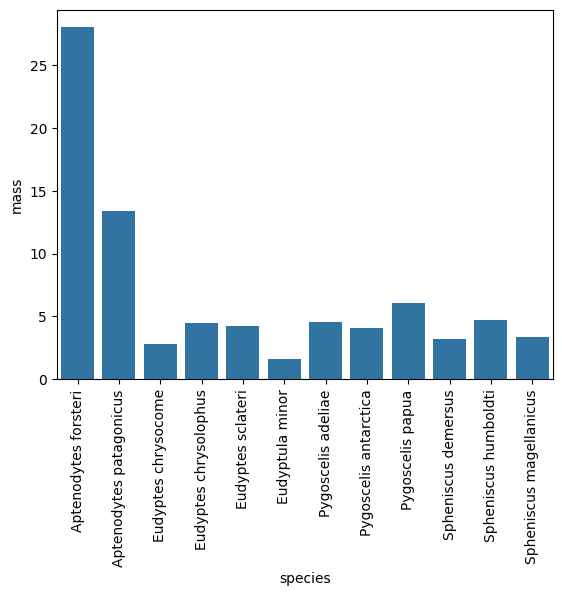

In [20]:
## 8 ##
## Plot a bar-chart of the mass with the x-axes labeled with species names.
## *Q1* What is the smallest penguin species? 
## *Q2* What is the geographical range of this species?

## I used the following resources: https://seaborn.pydata.org/generated/seaborn.barplot.html and 
## Q1: The smallest penguin is Eudyptes minor (Little Penguin)
## Q2: According to https://datazone.birdlife.org/species/factsheet/little-penguin-eudyptula-minor 
## The Little Penguin is endemic to Australia, specifically Western Australia to New Sourth Wales. 
## They are also found in New Zealand in the Chatham Islands and Mainland New Zealand but are not found in Fiorland and South Westland.

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(penguins_df, x="species", y="mass", legend = True)
plt.xticks(rotation = 90)



                   species   mass  GC_content  molecular_weight
0     Aptenodytes forsteri  28.00   48.381452        42459.6021
1  Aptenodytes patagonicus  13.40   49.693788        42563.7067
2      Eudyptes chrysocome   2.80   51.181102        42475.5753
3    Eudyptes chrysolophus   4.50   50.918635        42445.5493
4        Eudyptes sclateri   4.25   50.831146        42475.5753
species              object
mass                float64
GC_content          float64
molecular_weight    float64
dtype: object


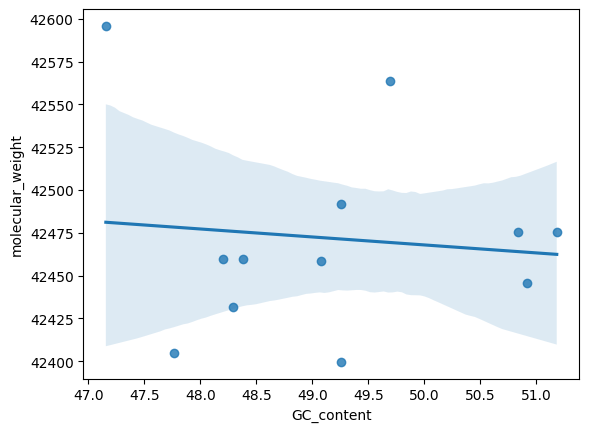

In [21]:
## 9 ##
## Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

def mol_vs_GC(data_frame):
    sns.regplot(data_frame, x = "GC_content", y = "molecular_weight")

## check to see why this error is happening by looking at the data type
print(penguins_df.head())
print(penguins_df.dtypes)

## used this site for help with this issue https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html

## x and y variables need to be numeric
penguins_df['GC_content'] = pd.to_numeric(penguins_df['GC_content'], errors='coerce')
penguins_df['molecular_weight'] = pd.to_numeric(penguins_df['molecular_weight'], errors='coerce')

## now try to plot
mol_vs_GC(penguins_df)

In [25]:
## 10 ##
## Save the new DataFrame to a file called "penguins_mass_cytb.csv"

penguins_df.to_csv('penguins_mass_cytb.csv', index = False)

penguins_df = pd.read_csv('penguins_mass_cytb.csv')

print(penguins_df)

                    species   mass  GC_content  molecular_weight
0      Aptenodytes forsteri  28.00   48.381452        42459.6021
1   Aptenodytes patagonicus  13.40   49.693788        42563.7067
2       Eudyptes chrysocome   2.80   51.181102        42475.5753
3     Eudyptes chrysolophus   4.50   50.918635        42445.5493
4         Eudyptes sclateri   4.25   50.831146        42475.5753
5           Eudyptula minor   1.60   49.256343        42491.6408
6        Pygoscelis adeliae   4.60   49.081365        42458.6140
7     Pygoscelis antarctica   4.10   47.769029        42404.5423
8          Pygoscelis papua   6.10   47.156605        42595.8759
9       Spheniscus demersus   3.20   48.293963        42431.5490
10     Spheniscus humboldti   4.75   49.256343        42399.5520
11  Spheniscus magellanicus   3.40   48.206474        42459.6021
